Number of bins: 350
A_value= 0.999999999999999
B_value= 1.9265196680045287e-15
b_value= 1.9265196680045306e-15
Total chi-squared per counts: 0.9352592934559955


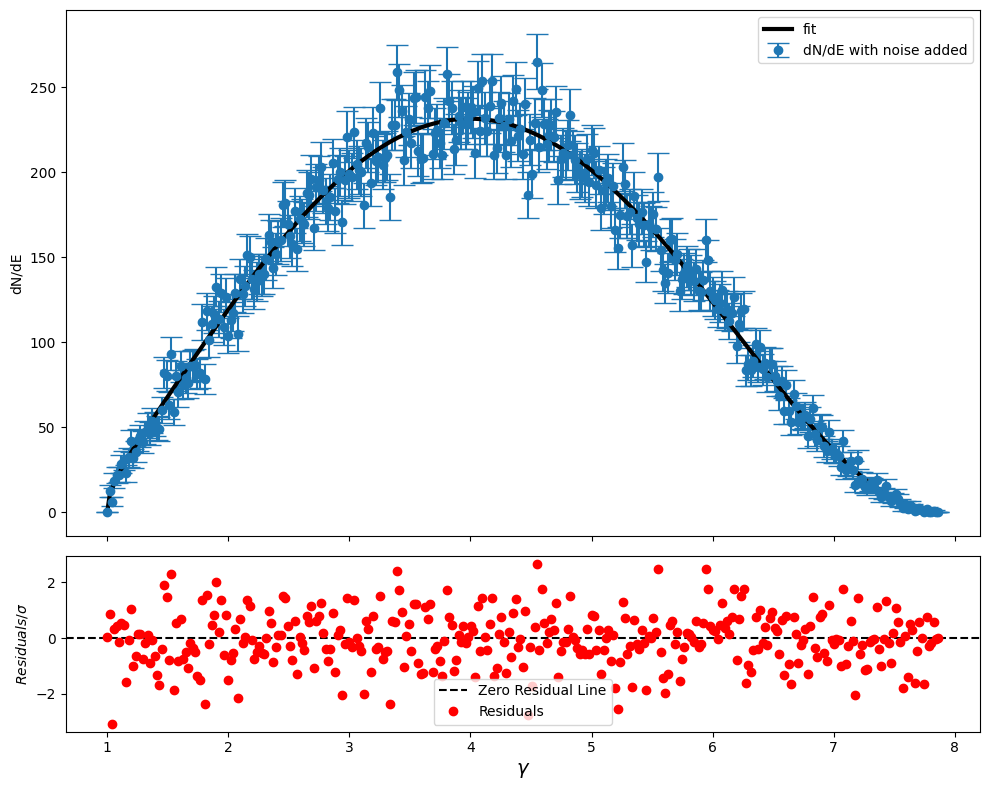

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

M_e = 0.511  # Mass of the electron in MeV
E_o = 3.508 + M_e  # Endpoint energy for He-6 in MeV
channels = 10e4  # Number of channels in the spectrum
number_of_counts = 10e2
#print(number_of_counts)
# Calculate the range of energy values
start_energy = M_e 
end_energy = E_o 

# Calculate the bin size based on the total counts and number of slices
bin_size = number_of_counts / channels

# Determine the number of bins based on the energy range and bin size
num_bins = int((end_energy - start_energy) / bin_size)

print("Number of bins:", num_bins)

E_e=np.linspace(start_value, end_value, num_bins+1)
gamma = E_e / M_e


gamma_i = []
N_i = []
error_vals = []
original_N = []
f1_arr = []
f2_arr = []
X_o = E_o / M_e
main_func = []


def func_1(X_i):
    p_e = np.sqrt(X_i ** 2 - 1)
    f_1 = p_e * X_i * (X_o - X_i) ** 2
    return f_1


def func_2(f_1, X_i):
    f_2 = f_1 / X_i
    return f_2


"""def mullerbox(mean, std):
    u1 = np.random.rand()
    u2 = np.random.rand()

    y1 = np.cos(2 * np.pi * u2) * np.sqrt(-2 * np.log(u1))
    y2 = np.sin(2 * np.pi * u2) * np.sqrt(-2 * np.log(u1))

    z1 = y1 * std + mean
    return z1"""


sum_a_11=0
sum_a_12=0
sum_a_21=0
sum_a_22=0
a11=[]
a12=[]
a21=[]
a22=[]


for g in gamma:
    X_i = g
    #print(X_i)
    f_1 = func_1(X_i)
    f_2 = func_2(f_1, X_i)
    normalized_values = f_1 
    N_value = normalized_values
    N_std_dev = np.sqrt(N_value)
    #x1 = mullerbox(N_value, N_std_dev)
    x1=np.random.normal(N_value,N_std_dev)
    m1 = abs(x1)
    error_N = np.sqrt(m1)
    sigma= error_N
    a_11 = (f_1/sigma)**2
    if sigma != 0:
        sigma = error_N
    else:
        a_11 = 0
    a_12 = ((f_1*f_2)/(sigma)**2)
    a_21 = ((f_2*f_1)/(sigma)**2)
    a_22 = ((f_2*f_2)/(sigma)**2)
    sum_a_11 = sum_a_11 + a_11
    sum_a_12 = sum_a_12 + a_12
    sum_a_21 = sum_a_21 + a_21
    sum_a_22 = sum_a_22 + a_22
    c_11 = sum_a_11 
    c_21 = sum_a_12
    #print(c_11)
    a11.append(sum_a_11)
    a12.append(sum_a_12)
    a21.append(sum_a_21)
    a22.append(sum_a_22)
    f1_arr.append(f_1)
    f2_arr.append(f_2)
    main_func.append(f_1)
    gamma_i.append(g)
    N_i.append(m1)
    error_vals.append(error_N)


A = np.matrix([[sum_a_11, sum_a_12],[sum_a_21, sum_a_22]])
B = np.matrix([[c_11], [c_21]])
A_inverse = np.linalg.inv(A)   
X= A_inverse * B              
A_val=X[0,0]
B_val=X[1,0]
print("A_value=", A_val)
print("B_value=", B_val)
normalisation_constant= X[1,0]/X[0,0]
print('b_value=',normalisation_constant)
normalized_fit= [((A_val*f1_val)+(B_val*f2_val)) for f1_val, f2_val in zip(f1_arr, f2_arr)]
fit_data=(normalized_fit)

sum_chi = 0
residuals=[]
dof=2
#  calculating the chi-squared for each element in the lists
for fit_dat, data, sigma in zip(fit_data, N_i, error_vals):
      chi_squared = ((fit_dat - data) / sigma)**2
      sum_chi += chi_squared
      residuals.append((data - fit_dat) / sigma)
print("Total chi-squared per counts:", (sum_chi/(num_bins-dof)))


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(10, 8))

# Plot main data with error bars and labels
ax1.errorbar(gamma_i, N_i, yerr=error_vals, fmt='o', capsize=8, label='dN/dE with noise added')
ax1.plot(gamma_i, normalized_fit, color='black', label='fit', linewidth=3)
ax1.legend()
ax1.set_ylabel('dN/dE')

# Plot residuals with a zero line and labels
ax2.errorbar(gamma_i, residuals, fmt='o', capsize=8 ,label='Residuals', color='red')
ax2.axhline(y=0, color='black', linestyle='--', label='Zero Residual Line')
ax2.legend()
ax2.set_xlabel('$\\gamma$', fontsize=14)
ax2.set_ylabel('$Residuals/\\sigma$')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('fitted_He6_spectrum.png')

# Show the plot
plt.show()

The Grid method (serving as a test check)

In [108]:
import numpy as np
N_a = 1000
N_b=1000
A_array = np.linspace(-1, 1, N_a)
B_array = np.linspace(1e-14, 1e-17, N_b)

min_chi_sq = float('inf')  # Initialize min_chi_sq to positive infinity
best_a, best_b = 0, 0  # Initialize best_a and best_b

for a in A_array:
    for b in B_array:
        sum_chisq = 0
        for f1_val, f2_val, data, sigma in zip(f1_arr, f2_arr, N_i, error_vals):
            chi_sq = ((((a * f1_val) + (b * f2_val)) - data) / sigma) ** 2
            sum_chisq += chi_sq

        # Check if the current sum_chisq is smaller than the minimum found so far
        if sum_chisq < min_chi_sq:
            min_chi_sq = sum_chisq
            best_a, best_b = a, b

print("Minimum sum_chisq:", (min_chi_sq))
print("Best values - A:", best_a, "B:", best_b)
print("total chisq_per_counts=", min_chi_sq/num_bins)
print("value of b =", best_b/best_a)

Minimum sum_chisq: 324.4330154141237
Best values - A: 0.9959959959959961 B: 3.999999999999986e-16
total chisq_per_counts= 0.926951472611782
value of b = 4.0160804020100357e-16


A_value= 0.9959959959959961
B_value= 3.999999999999986e-16
Total chi-squared per counts: 0.9322787799256428


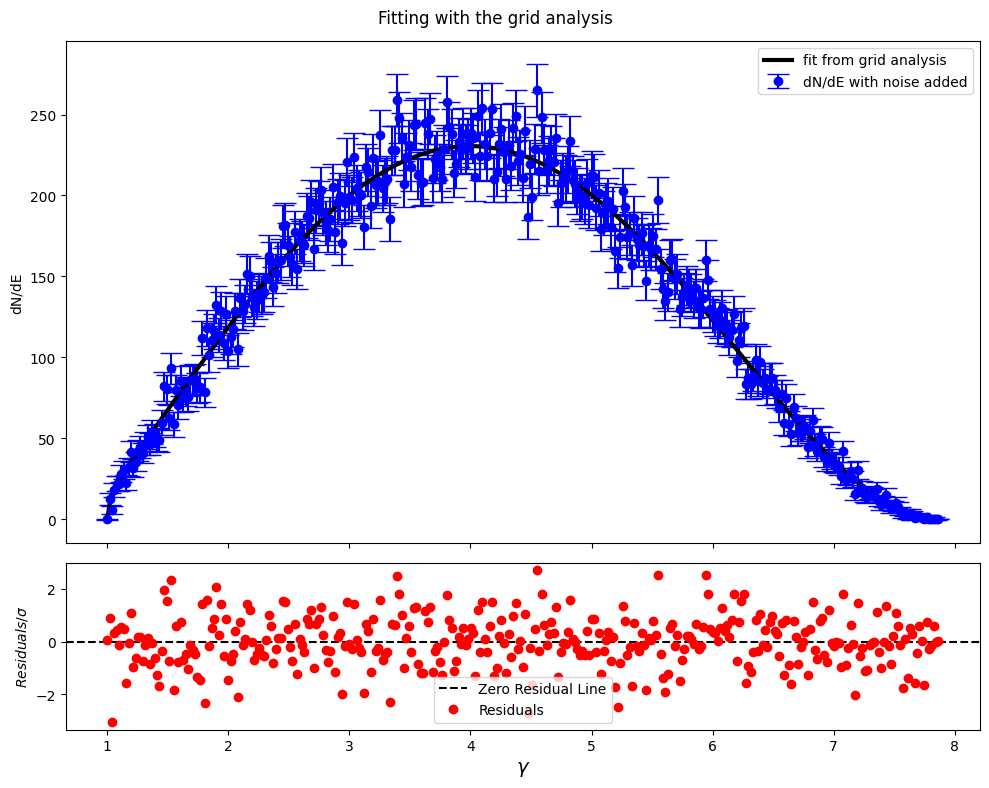

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


A_val=best_a
B_val=best_b
print("A_value=", A_val)
print("B_value=", B_val)


normalized_fit= [((A_val*f1_val)+(B_val*f2_val)) for f1_val, f2_val in zip(f1_arr, f2_arr)]
fit_data=(normalized_fit)

sum_chi = 0
residuals=[]
dof=2
# calculating the chi-squared for each element in the lists
for fit_dat, data, sigma in zip(fit_data, N_i, error_vals):
      chi_squared = ((fit_dat - data) / sigma)**2
      sum_chi += chi_squared
      residuals.append((data - fit_dat) / sigma)
print("Total chi-squared per counts:", (sum_chi/(num_bins-dof)))


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [3, 1]}, figsize=(10, 8))

# Plot main data with error bars and labels
ax1.errorbar(gamma_i, N_i, yerr=error_vals, fmt='o', capsize=8, label='dN/dE with noise added', color='b')
ax1.plot(gamma_i, normalized_fit, color='black', label='fit from grid analysis', linewidth=3)
ax1.legend()
ax1.set_ylabel('dN/dE')

# Plot residuals with a zero line and labels
ax2.errorbar(gamma_i, residuals, fmt='o', capsize=8 ,label='Residuals', color='red')
ax2.axhline(y=0, color='black', linestyle='--', label='Zero Residual Line')
ax2.legend()
ax2.set_xlabel('$\\gamma$', fontsize=14)
ax2.set_ylabel('$Residuals/\\sigma$')

# Adjust layout for better spacing
plt.suptitle('Fitting with the grid analysis')
plt.tight_layout()
plt.savefig('fitted_He6_spectrum.png')
